# Implémentation de Policy Iteration, Value Iteration et Epsilon-Greedy dans un environnement Frozen Lake

## Chargement des bibliothèques

In [ ]:
import pandas as pd # Utilisé pour une représentation parlante des données
import time # Mesurer le temps d'exécution des différents algorithmes

import numpy as np
import matplotlib.pyplot as plt

## Implementation des fonctions

In [ ]:
def draw_grid(df, start_state, goal_state, holes, grid_size, algorithm):
    # 1. Préparation des données
    # On initialise une matrice vide pour les valeurs
    grid_values = np.zeros(grid_size)

    # Remplissage de la matrice avec les valeurs du DataFrame
    for _, row in df.iterrows():
        state = row['state'] # Format 'Sij'
        val = row['max_value']

        # Extraction des indices i et j (gère S12 -> ligne 1, col 2)
        try:
            i = int(state[1])
            j = int(state[2])
            if i < grid_size[0] and j < grid_size[1]:
                grid_values[i, j] = val
        except (IndexError, ValueError):
            continue

    # 3. Création de la figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Dessiner le fond (couleur glace légère)
    ax.set_facecolor('#e0f7ff')

    # Affichage des valeurs sous forme de Heatmap légère
    im = ax.imshow(grid_values, cmap='Blues', alpha=0.3)

    # Configuration de la grille
    ax.set_xticks(np.arange(-.5, grid_size[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, grid_size[0], 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)

    # 4. Ajout des textes et des icônes
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Position (j, i) car matplotlib utilise (x, y)

            # Si c'est un trou
            if f"S{i}{j}" in holes:
                ax.add_patch(plt.Circle((j, i), 0.4, color='#4cc9f0'))
                label = "HOLE"
                color = "red"
            elif f"S{i}{j}" == start_state:
                label = "START"
                color = "green"
            elif f"S{i}{j}" == goal_state:
                label = "GOAL"
                color = "gold"
            else:
                label = ""
                color = "black"

            # Affichage de la valeur numérique
            val_text = f"{grid_values[i, j]:.2e}" if grid_values[i, j] != 0 else "0"
            ax.text(j, i, f"{label}\n{val_text}", ha="center", va="center",
                    fontsize=8, color=color, fontweight='bold')

    plt.title(f"Frozen Lake grid - {algorithm}", fontsize=15)
    plt.colorbar(im, label='Intensité de la valeur')
    plt.show()

In [ ]:
def plot_state_value(list_df, states):
    """
    Affiche l'évolution de la valeur pour une liste d'états donnés.

    Args:
        list_df (list): Liste de DataFrames (un par étape/itération).
        states (list): Liste des noms d'états à suivre (ex: ['S00', 'S11']).
    """
    # 1. Extraction des données
    # On crée un dictionnaire pour stocker les chronologies de chaque état
    history = {state: [] for state in states}

    for df in list_df:
        for state in states:
            # On cherche la valeur correspondant à l'état dans le DF actuel
            val = df.loc[df['state'] == state, 'max_value'].values
            history[state].append(val[0])

    # 2. Création des graphiques
    num_plots = len(states)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 4 * num_plots), sharex=True)

    # Gérer le cas où il n'y a qu'un seul état (axes n'est pas une liste)
    if num_plots == 1:
        axes = [axes]

    for ax, state in zip(axes, states):
        # 'where="post"' crée l'escalier au moment où la valeur change
        ax.step(
            range(len(history[state])),
            history[state],
            where='post',
            color='#4cc9f0',
            label=f'Valeur de {state}',
            linewidth=2
        )
        # Force l'affichage de chaque entier sur l'axe X
        ax.set_xticks(range(len(history[state])))

        ax.set_title(f"{state} values evolution", fontsize=12, fontweight='bold')
        ax.set_ylabel("Max Value")
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()

    plt.xlabel("Itérations / Étapes de l'algorithme")
    plt.tight_layout()
    plt.show()

In [ ]:
def state_max_value(Q_table):

  Q_table_max = pd.DataFrame({
      "state": Q_table["state"],
      "max_value": Q_table[actions].max(axis=1)
  })

  return Q_table_max

## Organisation des données

In [ ]:
# toutes les actions possibles
actions = ["droite", "gauche", "haut", "bas", "arriver"]

# Sij est l'état associé à la cellule de la i-ème ligne et j-ème colonne
states = [f"S{line}{column}" for line in range(7) for column in range(7)]

# Création des DataFrames
Q_table = pd.DataFrame(columns=["state"] + actions)
Q_table["state"] = states

Q_policy = pd.DataFrame(columns=["state"] + actions)
Q_policy["state"] = states

Q_value = pd.DataFrame(columns=states)
# Affichage des DataFrames
print("\n ---------------------- states ----------------------------- \n")
print(states)
print("\n --------------------- Q_value ----------------------------- \n")
print(Q_value.head(0))
print("\n --------------------- Q_table ----------------------------- \n")
print(Q_table.head(0))
print("\n --------------------- Q_policy ---------------------------- \n")
print(Q_policy.head(0))


 ---------------------- states ----------------------------- 

['S00', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66']

 --------------------- Q_value ----------------------------- 

Empty DataFrame
Columns: [S00, S01, S02, S03, S04, S05, S06, S10, S11, S12, S13, S14, S15, S16, S20, S21, S22, S23, S24, S25, S26, S30, S31, S32, S33, S34, S35, S36, S40, S41, S42, S43, S44, S45, S46, S50, S51, S52, S53, S54, S55, S56, S60, S61, S62, S63, S64, S65, S66]
Index: []

[0 rows x 49 columns]

 --------------------- Q_table ----------------------------- 

Empty DataFrame
Columns: [state, droite, gauche, haut, bas, arriver]
Index: []

 --------------------- Q_policy ---------------------------- 

Empty DataFrame
C

## Modélisation des différentes actions pour chaque État

In [ ]:
# Initialisation de la grille et définition des états particuliers
state_2_action = {}
nb_line = 7
nb_column = 7
goal_state = "S00"
start_state = "S66"
bad_states = {"S06", "S22", "S40", "S42", "S45", "S55", "S63"}

# mouvements possibles
moves = {
    "droite": (0,1),
    "gauche": (0,-1),
    "haut": (-1,0),
    "bas": (1,0),
    "arriver" : (0,0)
}

# Génération des actions possibles pour chaque état
for line in range(nb_line):
    for column in range(nb_column):
        state = f"S{line}{column}"

        # Cas particulier : l'état BUT
        if state == goal_state:
            state_2_action[state] = ["arriver"]
            continue

        possible = []
        for action, (dl, dc) in moves.items():
            if action == "arriver":
                continue

            new_line = line + dl
            new_col = column + dc

            # Vérification : est-ce que le mouvement reste dans la grille ?
            if 0 <= new_line < nb_line and 0 <= new_col < nb_column:
                possible.append(action)

        state_2_action[state] = possible

# Création d'un dataframe représentant la grille
Data = pd.DataFrame(columns=["state", "action", "transition", "reward"])
rows = []
for state, allowed_actions in state_2_action.items():
    for action in allowed_actions:
        rows.append({"state": state, "action": action})

Data = pd.DataFrame(rows)

# Affichage
print("\n -------------------- states actions --------------------------- \n")
print(state_2_action)
print("\n --------------------- Data ---------------------------- \n")
print(Data)


 -------------------- states actions --------------------------- 

{'S00': ['arriver'], 'S01': ['droite', 'gauche', 'bas'], 'S02': ['droite', 'gauche', 'bas'], 'S03': ['droite', 'gauche', 'bas'], 'S04': ['droite', 'gauche', 'bas'], 'S05': ['droite', 'gauche', 'bas'], 'S06': ['gauche', 'bas'], 'S10': ['droite', 'haut', 'bas'], 'S11': ['droite', 'gauche', 'haut', 'bas'], 'S12': ['droite', 'gauche', 'haut', 'bas'], 'S13': ['droite', 'gauche', 'haut', 'bas'], 'S14': ['droite', 'gauche', 'haut', 'bas'], 'S15': ['droite', 'gauche', 'haut', 'bas'], 'S16': ['gauche', 'haut', 'bas'], 'S20': ['droite', 'haut', 'bas'], 'S21': ['droite', 'gauche', 'haut', 'bas'], 'S22': ['droite', 'gauche', 'haut', 'bas'], 'S23': ['droite', 'gauche', 'haut', 'bas'], 'S24': ['droite', 'gauche', 'haut', 'bas'], 'S25': ['droite', 'gauche', 'haut', 'bas'], 'S26': ['gauche', 'haut', 'bas'], 'S30': ['droite', 'haut', 'bas'], 'S31': ['droite', 'gauche', 'haut', 'bas'], 'S32': ['droite', 'gauche', 'haut', 'bas'], 'S33': 

## Modelisation de la grille et Initialisation de Q_policy et Q_table

In [ ]:
# --- grille et utilitaires ---
grid = {}
for line in range(nb_line) :
  for column in range(nb_column) :
    grid[f"S{line}{column}"] = (line,column)

# Dictionnaire état actions
id_2_state = {id : state for state, id in grid.items()}

def init_data():
    # --- Initialisation générale Q_value ---
    Q_value.loc[0] = [0.0] * len(states)

    # --- Initialisation générale Q_table ---
    Q_table[actions] = 0.0

    # --- Initialisation générale Q_policy ---
    Q_policy[actions] = 0.0
    for state in  states :
      Q_policy.loc[Q_policy["state"] == state, state_2_action[state]]  = 1 / len(state_2_action[state])

    # --- remplissage : ajout des états transition et des rewards ---
    transitions = []
    rewards = []

    for _, row in Data.iterrows():

        state = row["state"]
        action = row["action"]

        line, column = grid[state]
        d_line, d_column = moves[action]
        line, column = line + d_line, column + d_column
        new_state = id_2_state[(line, column)]

        if new_state in bad_states:
          rewards.append(-10) # case dangereuse
        elif state == goal_state and action == "arriver" :
          rewards.append(10)
        else:
          rewards.append(0) # case gelée

        transitions.append(new_state)

    Data["transition"] = transitions
    Data["reward"] = rewards

    return Q_value, Q_table, Q_policy, Data

Q_value, Q_table, Q_policy, Data = init_data()

# --- Affichage ---
print("\n --------------------- Q_value ----------------------------- \n")
print(Q_value)
print("\n --------------------- Q_table ----------------------------- \n")
print(Q_table)
print("\n --------------------- Q_policy ---------------------------- \n")
print(Q_policy)
print("\n --------------------- Data ---------------------------- \n")
print(Data)


 --------------------- Q_value ----------------------------- 

   S00  S01  S02  S03  S04  S05  S06  S10  S11  S12  ...  S54  S55  S56  S60  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   S61  S62  S63  S64  S65  S66  
0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 49 columns]

 --------------------- Q_table ----------------------------- 

   state  droite  gauche  haut  bas  arriver
0    S00     0.0     0.0   0.0  0.0      0.0
1    S01     0.0     0.0   0.0  0.0      0.0
2    S02     0.0     0.0   0.0  0.0      0.0
3    S03     0.0     0.0   0.0  0.0      0.0
4    S04     0.0     0.0   0.0  0.0      0.0
5    S05     0.0     0.0   0.0  0.0      0.0
6    S06     0.0     0.0   0.0  0.0      0.0
7    S10     0.0     0.0   0.0  0.0      0.0
8    S11     0.0     0.0   0.0  0.0      0.0
9    S12     0.0     0.0   0.0  0.0      0.0
10   S13     0.0     0.0   0.0  0.0      0.0
11   S14     0.0     0.0   0.0  0.0      0.0
12   S15     0.0     0.0   0.0  0.0

## Implementation : Policy Iteration

Par défaut, nous avons donné la valeur 0 a min_iteration. Ainsi, l'algorithme Policy Iterration s'arrêtera lorsque la Q_Policy convergera. Mais la convergence de la politique n'implique pas nécessairement la convergence des valeurs des États. D'où les différences minimes les valeurs de certains états entre les algorithmes (Policy Iteration et Value Iteration). Mais, cela peut être corrigé aisément en augmentant la valeur de la variable min_iteration ci-dessous.

In [ ]:
def Policy_iteration(
  Q_table, Q_policy, Data,

  # Initialisation des hyperparamètres
  gamma = 0.2,
  max_iteration = 100, #Nombre d'iteration maximum
  min_iteration = 7, #Nombre d'iteration minimu
):

  # Initialisation
  converged = False
  iteration = 0
  value_cahe = [] # Evolution des valeurs d'états
  value_cahe.append(state_max_value(Q_table))

  while not converged:
      iteration += 1
      Q_policy_old = Q_policy.copy()

      # Mémorisation des valeurs de chaque état
      Q_table_max = pd.DataFrame({
          "state": Q_table["state"],
          "max_value": Q_table[actions].max(axis=1)
      })
      value_cahe.append(Q_table_max)

      for state in states:
          state_actions = state_2_action[state]

          # -------------------------
          # 1. Sélection de l'action optimale selon la politique
          # -------------------------
          policy_row = Q_policy.loc[Q_policy["state"] == state, state_actions]
          max_prob = policy_row.max(axis=1).values[0]

          # Actions ayant la probabilité maximale
          best_actions_in_policy = policy_row.columns[policy_row.iloc[0] == max_prob].tolist()

          # Tirage aléatoire parmi les meilleures
          chosen_action = np.random.choice(best_actions_in_policy)

          # -------------------------
          # 2. Update Q_table (Action spécifique)
          # -------------------------
          RT = Data.loc[(Data["state"] == state) & (Data["action"] == chosen_action)]

          next_state = RT["transition"].iloc[0]
          reward = RT["reward"].iloc[0]

          # V(S') = max de la ligne de l'état suivant dans la Q_table
          v_next = Q_table.loc[Q_table["state"] == next_state, actions].max(axis=1).values[0]

          # Mise à jour de la Q-valeur
          Q_table.loc[Q_table["state"] == state, chosen_action] = reward + (gamma * v_next)

          # -------------------------
          # 3. Update Q_policy (Amélioration)
          # -------------------------
          row_q_values = Q_table.loc[Q_table["state"] == state, state_actions]
          max_q = row_q_values.max(axis=1).values[0]

          mask = row_q_values.eq(max_q)
          count_best = mask.sum(axis=1).values[0]

          # On remet à zéro et on distribue les probabilités
          Q_policy.loc[Q_policy["state"] == state, actions] = 0.0
          Q_policy.loc[Q_policy["state"] == state, state_actions] = mask.astype(float).div(count_best)


      # -------------------------
      # 4. Sauvegarde de la Q-table (Après avoir fait tous les états)
      # -------------------------
      value_cahe.append(state_max_value(Q_table))

      # -------------------------
      # 5. Test de convergence global
      # -------------------------
      converged = Q_policy_old[actions].equals(Q_policy[actions]) and iteration >= min_iteration

      print(f"Itération {iteration} terminée...")

      if iteration >= max_iteration:
          break

  if converged :
    print(f"Convergence de Q_policy à l'itération {iteration} !")
  else :
    print(f"Convergence de Q_policy non atteinte après l'itération {iteration} !")

  return value_cahe, Q_table, Q_policy

## Affichage des résultats : Policy Iteration

In [ ]:
_, Q_table, Q_policy, Data = init_data() #Réinitialisation des tables (Q_table, Q_policy, Q_value)
start = time.time() #Enregistrer l'heure de depart

# Voir la définition de Policy_iteration pour la valeur des hyperparamètres
value_cahe, Q_table, Q_policy = Policy_iteration(Q_table = Q_table, Q_policy = Q_policy, Data = Data) #Lancer l'algorithme Policy_iteration

end = time.time() #Enregistrer l'heure de fin

print("Temps d'exécution de Policy Iteration :", end - start, "secondes")

Itération 1 terminée...
Itération 2 terminée...
Itération 3 terminée...
Itération 4 terminée...
Itération 5 terminée...
Itération 6 terminée...
Itération 7 terminée...
Itération 8 terminée...
Itération 9 terminée...
Itération 10 terminée...
Itération 11 terminée...
Itération 12 terminée...
Itération 13 terminée...
Convergence de Q_policy à l'itération 13 !
Temps d'exécution de Policy Iteration : 7.425294399261475 secondes


In [ ]:
# Affichage de Q_policy
print("\n --------------------- Q_policy ---------------------------- \n")
print(Q_policy)

# Affichage de Q_value
print("\n --------------------- Q_table ---------------------------- \n")
print(Q_table)


 --------------------- Q_policy ---------------------------- 

   state  droite  gauche  haut  bas  arriver
0    S00     0.0     0.0   0.0  0.0      1.0
1    S01     0.0     1.0   0.0  0.0      0.0
2    S02     0.0     1.0   0.0  0.0      0.0
3    S03     0.0     1.0   0.0  0.0      0.0
4    S04     0.0     1.0   0.0  0.0      0.0
5    S05     0.0     1.0   0.0  0.0      0.0
6    S06     0.0     1.0   0.0  0.0      0.0
7    S10     0.0     0.0   1.0  0.0      0.0
8    S11     0.0     1.0   0.0  0.0      0.0
9    S12     0.0     1.0   0.0  0.0      0.0
10   S13     0.0     1.0   0.0  0.0      0.0
11   S14     0.0     0.0   1.0  0.0      0.0
12   S15     0.0     0.0   1.0  0.0      0.0
13   S16     0.0     1.0   0.0  0.0      0.0
14   S20     0.0     0.0   1.0  0.0      0.0
15   S21     0.0     0.0   1.0  0.0      0.0
16   S22     0.0     1.0   0.0  0.0      0.0
17   S23     0.0     0.0   0.0  1.0      0.0
18   S24     0.0     1.0   0.0  0.0      0.0
19   S25     0.0     0.0   1.0  0.0 

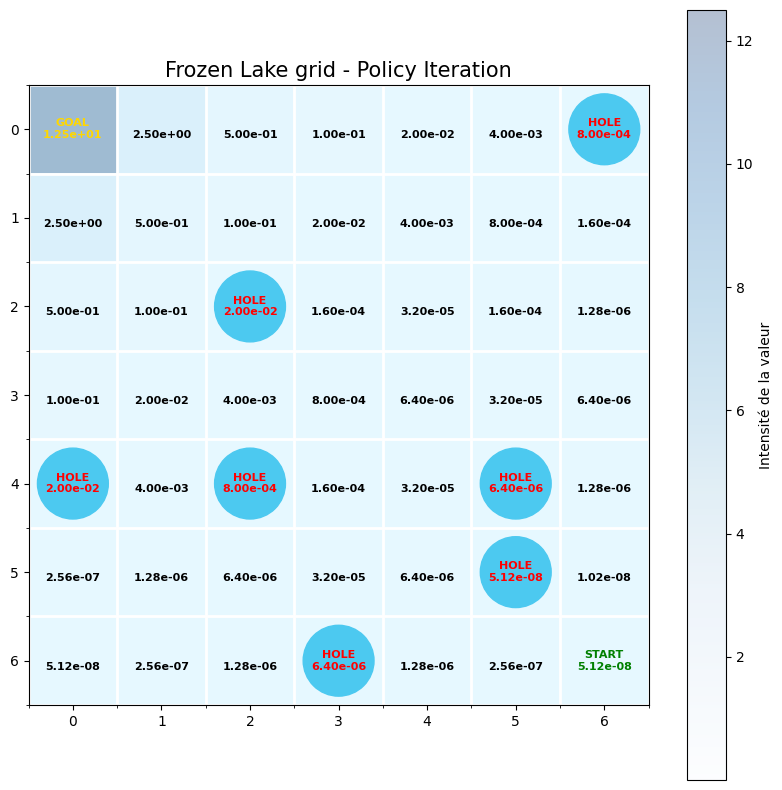

In [ ]:
# Affichage du tableau de jeu et des valeurs des différents états
draw_grid(
    df = value_cahe[-1],
    start_state = start_state,
    goal_state = goal_state,
    holes = bad_states,
    grid_size = (nb_line, nb_column),
    algorithm = "Policy Iteration"
)

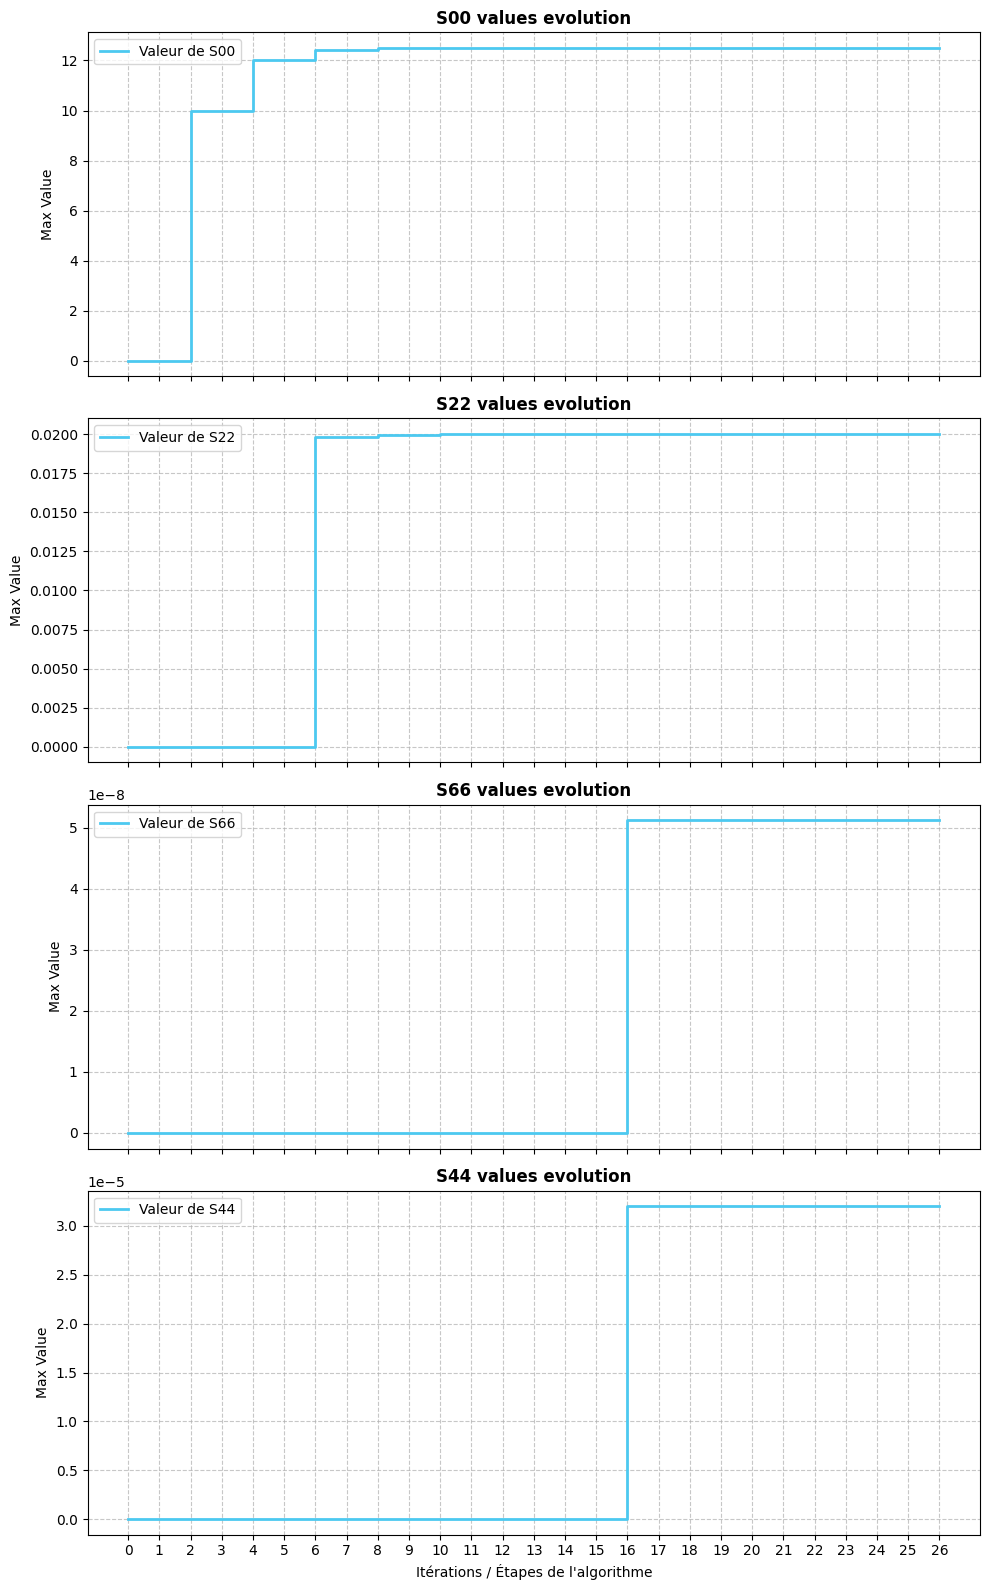

In [ ]:
# Ajouter les états dont vous voulez afficher l'évolution de valeur dans states_2_plot

states_2_plot = [goal_state, next(iter(bad_states)), start_state, "S44"]
plot_state_value(list_df = value_cahe, states = states_2_plot)

## Implementation : Value Iteration

Vu que les rewards sont de l'ordre des dizaines, les valeurs des états seront donc beaucoup plus importantes que 0.001. Ainsi, nous proposons 0.001 comme valeur de δ.

In [ ]:
def Value_iteration(
  Q_value, Data,

  # Initialisation des hyperparamètres
  gamma = 0.2,
  delta = 0.001, # Seuil de précision pour la convergence
  max_iteration = 100, #Nombre d'iteration minimu
  min_iteration = 0, #Nombre d'iteration maximum
):

  # Initialisation
  converged = False
  iteration = 0
  value_cahe = [] # Evolution des valeurs d'états

  # Mémorisation des valeurs de chaque état
  # On le transpose pour que les noms de colonnes (S00, S01...) deviennent l'index
  Q_table_max = Q_value.T.reset_index()
  # On renomme les colonnes pour correspondre au format cible
  Q_table_max.columns = ['state', 'max_value']
  value_cahe.append(Q_table_max)

  while not converged:
      iteration += 1
      # On garde une copie pour comparer après le passage sur tous les états
      Q_value_old = Q_value.copy()

      # Mémorisation des valeurs de chaque état
      # On le transpose pour que les noms de colonnes (S00, S01...) deviennent l'index
      Q_table_max = Q_value_old.T.reset_index()
      # On renomme les colonnes pour correspondre au format cible
      Q_table_max.columns = ['state', 'max_value']
      value_cahe.append(Q_table_max)

      for state in states:
          # 1. Récupérer toutes les transitions possibles pour cet état
          RT = Data.loc[Data["state"] == state, ["transition", "reward"]]

          # 2. Récupérer les valeurs V(S') des états suivants
          # RT["transition"] contient les noms des états, on s'en sert pour filtrer les colonnes
          VT = Q_value[RT["transition"]].values[0]

          # 3. Calculer R + gamma * V(S') pour chaque action
          # V devient un vecteur contenant les valeurs de chaque action possible
          V_actions = RT["reward"].values + gamma * VT

          # 4. Appliquer l'opérateur de Bellman : V(s) = max(V_actions)
          Q_value.loc[0, state] = V_actions.max()

      # -------------------------
      # Test convergence (À l'extérieur de la boucle FOR)
      # -------------------------
      # Calcul de la différence maximale entre l'ancienne et la nouvelle table
      error = (Q_value_old[states] - Q_value[states]).abs().max(axis=1).iloc[0]

      if error < delta and iteration >= min_iteration :
          converged = True

      print(f"Itération {iteration} terminée...")

      if iteration >= max_iteration:
          break

  if converged :
    print(f"Convergence de Q_value atteinte à l'itération {iteration} !")
  else :
    print(f"Convergence de Q_value non atteinte après l'itération {iteration} !")

  return value_cahe, Q_value

## Affichage des résultats : Value Iteration

In [ ]:
Q_value, _, _, Data = init_data() #Réinitialisation des tables (Q_table, Q_policy, Q_value)
start = time.time() #Enregistrer l'heure de depart

# Voir la définition de Value_iteration pour la valeur des hyperparamètres
value_cahe, Q_value = Value_iteration(Q_value = Q_value, Data = Data) #Lancer l'algorithme Value_iteration

end = time.time() #Enregistrer l'heure de fin

print("Temps d'exécution de Q-learning :", end - start, "secondes")

Itération 1 terminée...
Itération 2 terminée...
Itération 3 terminée...
Itération 4 terminée...
Itération 5 terminée...
Itération 6 terminée...
Itération 7 terminée...
Convergence de Q_value atteinte à l'itération 7 !
Temps d'exécution de Q-learning : 0.3262181282043457 secondes


In [ ]:
# Affichage de Q_value
print("\n --------------------- Q_value ----------------------------- \n")
print(Q_value)


 --------------------- Q_value ----------------------------- 

        S00       S01       S02       S03   S04    S05     S06       S10  \
0  12.49984  2.499968  0.499994  0.099999  0.02  0.004  0.0008  2.499968   

        S11       S12  ...       S54       S55           S56       S60  \
0  0.499994  0.099999  ...  0.000006  0.000001  2.559967e-07  0.000032   

       S61       S62       S63       S64           S65           S66  
0  0.00016  0.000032  0.000006  0.000001  2.559967e-07  5.119934e-08  

[1 rows x 49 columns]


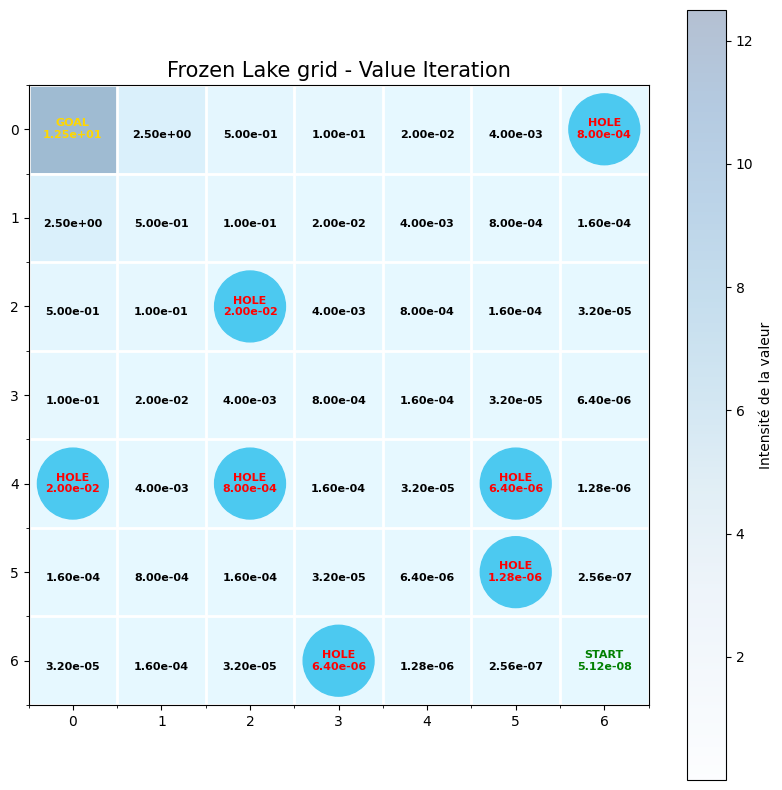

In [ ]:
# Affichage du tableau de jeu et des valeurs des différents états
draw_grid(
    df = value_cahe[-1],
    start_state = start_state,
    goal_state = goal_state,
    holes = bad_states,
    grid_size = (nb_line, nb_column),
    algorithm = "Value Iteration"
)

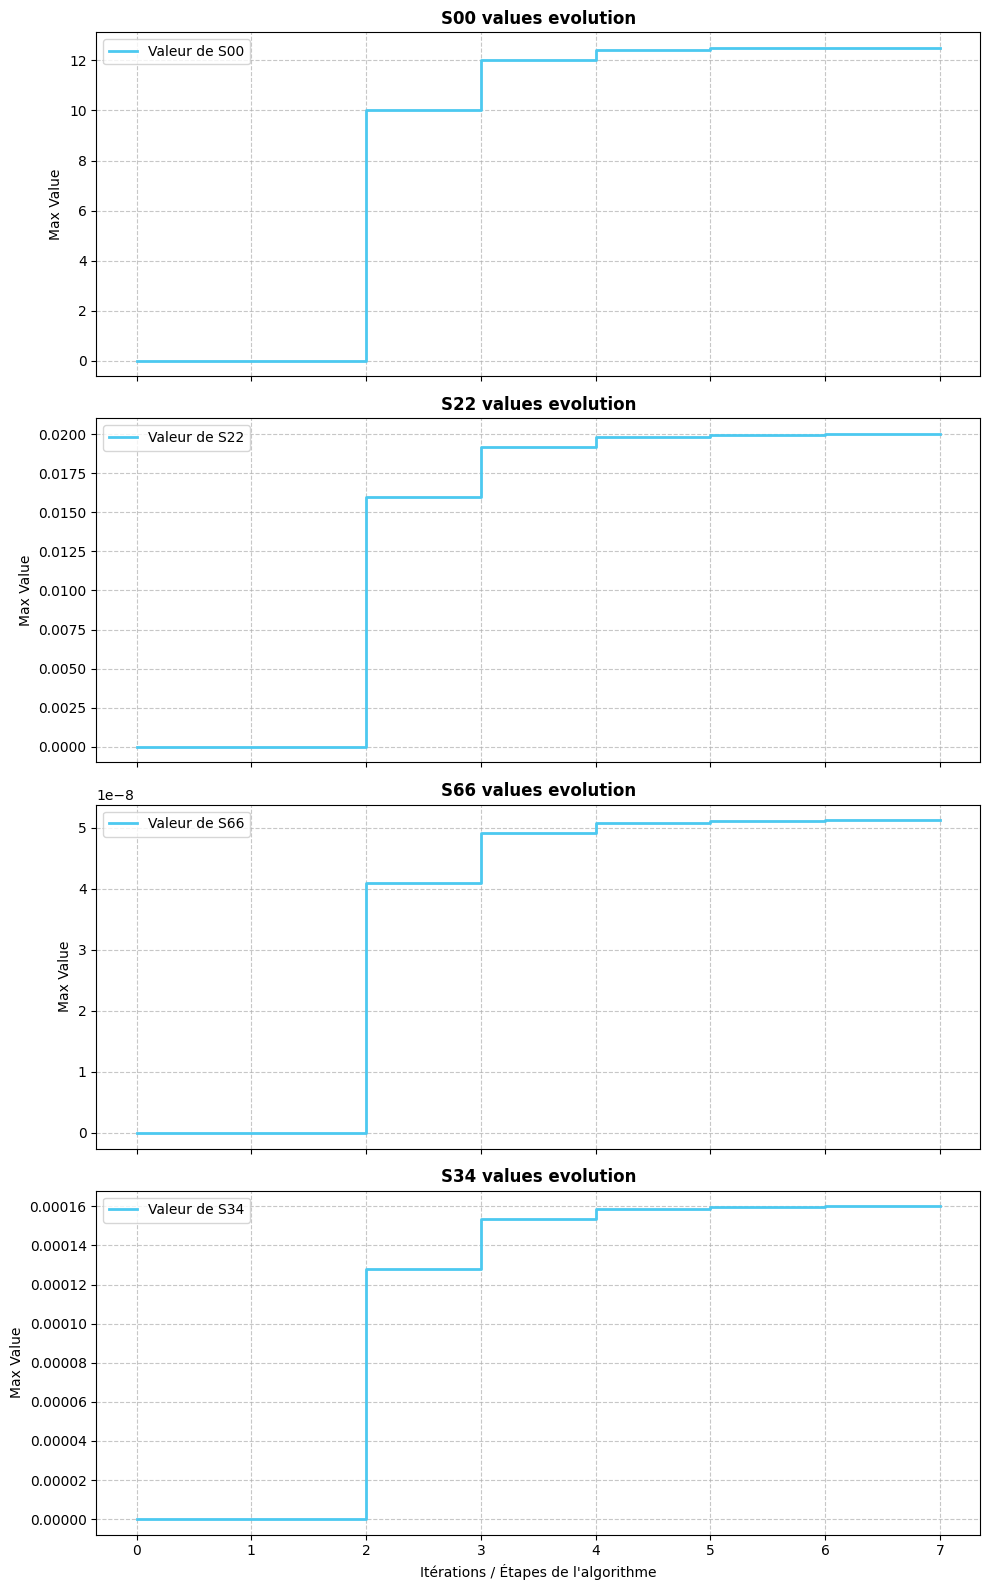

In [ ]:
# Ajouter les états dont vous voulez afficher l'évolution de valeur dans states_2_plot

states_2_plot = [goal_state, next(iter(bad_states)), start_state, "S34"]
plot_state_value(list_df = value_cahe, states = states_2_plot)

## Implementation : Q-learning

In [ ]:
def Q_learning(
  Q_table, Data,

  # Initialisation des hyperparamètres
  gamma = 0.2,  # Augmenté pour une meilleure vision à long terme
  alpha = 0.7,  # Réduit pour une convergence plus stable
  epsilon = 0.3,
  max_step = 700, # Nombre total de tentatives (épisodes)
  min_iteration = 0,
  max_iteration = 100 # Nombre max d'iteration par step
):

  # Initialisation
  path = [] # Chemin solution
  value_cahe = [] # Evolution des valeurs d'états
  value_cahe.append(state_max_value(Q_table))
  converged = False
  step = 0 # Équivalent à "episode"

  # Boucle des STEPS (Épisodes)
  for step in range(1, max_step + 1):
      next_state = start_state # On recommence au début à chaque step
      state = start_state
      path = []
      iteration = 0 # Compteur de mouvements dans ce step
      Q_table_old = Q_table.copy()
      action = ""

      # Boucle de mouvement à l'intérieur d'un step
      while state != goal_state:
          iteration += 1

          # Transition
          state = next_state

          # 1. Sélection optimale/aléatoire de l'action
          state_actions = state_2_action[state]
          Xt = np.random.rand()

          if Xt >= epsilon: # EXPLOITATION
              value_row = Q_table.loc[Q_table["state"] == state, state_actions]
              max_value = value_row.max(axis=1).values[0]
              best_actions = value_row.columns[value_row.iloc[0] == max_value].tolist()
              action = np.random.choice(best_actions)
          else: # EXPLORATION
              action = np.random.choice(state_actions)

          # 2. Update Q_table
          RT = Data.loc[(Data["state"] == state) & (Data["action"] == action)]
          next_state = RT["transition"].iloc[0]
          reward = RT["reward"].iloc[0]

          # V(S') = max de la ligne de l'état suivant
          v_next = Q_table.loc[Q_table["state"] == next_state, actions].max(axis=1).values[0]
          v = Q_table.loc[Q_table["state"] == state, action].values[0]

          # Mise à jour de la Q-valeur
          Q_table.loc[Q_table["state"] == state, action] = v + alpha * (reward + gamma * v_next - v)

          # Save path :
          path.append({"state": state, "action": action})

          # Sécurité pour éviter les boucles infinies dans un step
          if iteration >= max_iteration:
              break

      # -------------------------
      # 4. Sauvegarde de la Q-table (Après avoir fait tous les états)
      # -------------------------
      value_cahe.append(state_max_value(Q_table))

      # 5. Test de convergence (comparaison après un step complet)
      converged = Q_table_old[actions].equals(Q_table[actions])

      print(f"Step {step} terminé (iteration : {iteration})")

      if converged and step >= min_iteration:
          break

  if converged:
      print(f"Convergence de Q_table atteinte au step {step} !")
  else:
      print(f"Convergence de Q_table non atteinte après le step {step} !")

  return value_cahe, path, Q_table


## Affichage des résultats : Q-learning, ϵ = 0.3

In [ ]:
_, Q_table, _, Data = init_data() #Réinitialisation des tables (Q_table, Q_policy, Q_value)
start = time.time() #Enregistrer l'heure de depart

# Voir la définition de Q_learning pour la valeur des hyperparamètres
epsilon = 0.3
value_cahe, path, Q_table = Q_learning(Q_table = Q_table, Data = Data, epsilon = epsilon) #Lancer l'algorithme Q-learning

end = time.time() #Enregistrer l'heure de fin

print("Temps d'exécution de Q-learning :", end - start, "secondes")

Step 1 terminé (iteration : 100)
Step 2 terminé (iteration : 100)
Step 3 terminé (iteration : 100)
Step 4 terminé (iteration : 100)
Step 5 terminé (iteration : 45)
Step 6 terminé (iteration : 100)
Step 7 terminé (iteration : 100)
Step 8 terminé (iteration : 29)
Step 9 terminé (iteration : 59)
Step 10 terminé (iteration : 100)
Step 11 terminé (iteration : 100)
Step 12 terminé (iteration : 33)
Step 13 terminé (iteration : 100)
Step 14 terminé (iteration : 25)
Step 15 terminé (iteration : 100)
Step 16 terminé (iteration : 99)
Step 17 terminé (iteration : 61)
Step 18 terminé (iteration : 51)
Step 19 terminé (iteration : 100)
Step 20 terminé (iteration : 41)
Step 21 terminé (iteration : 57)
Step 22 terminé (iteration : 100)
Step 23 terminé (iteration : 23)
Step 24 terminé (iteration : 21)
Step 25 terminé (iteration : 19)
Step 26 terminé (iteration : 19)
Step 27 terminé (iteration : 29)
Step 28 terminé (iteration : 21)
Step 29 terminé (iteration : 67)
Step 30 terminé (iteration : 15)
Step 31

In [ ]:
# Affichage de la suite d'actions menant à la solution
print("\n --------------------- PATH ----------------------------- \n")
print(f"Partie remportée en : {len(path)} actions\n")
for elt in path :
  print(f"state : {elt["state"]} => action : {elt["action"]} \n")

# Affichage de Q_table
print("\n --------------------- Q_table ----------------------------- \n")
print(Q_table)


 --------------------- PATH ----------------------------- 

Partie remportée en : 13 actions

state : S66 => action : haut 

state : S56 => action : haut 

state : S46 => action : haut 

state : S36 => action : haut 

state : S26 => action : gauche 

state : S25 => action : haut 

state : S15 => action : gauche 

state : S14 => action : gauche 

state : S13 => action : gauche 

state : S12 => action : gauche 

state : S11 => action : gauche 

state : S10 => action : haut 

state : S00 => action : arriver 


 --------------------- Q_table ----------------------------- 

   state        droite        gauche          haut           bas  arriver
0    S00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     12.5
1    S01  9.739194e-02  2.500000e+00  0.000000e+00  7.000000e-02      0.0
2    S02  1.995026e-02  5.000000e-01  0.000000e+00  1.983800e-02      0.0
3    S03  3.990215e-03  1.000000e-01  0.000000e+00  3.999864e-03      0.0
4    S04  5.648477e-04  2.000000e-02  0.000000e+00  7

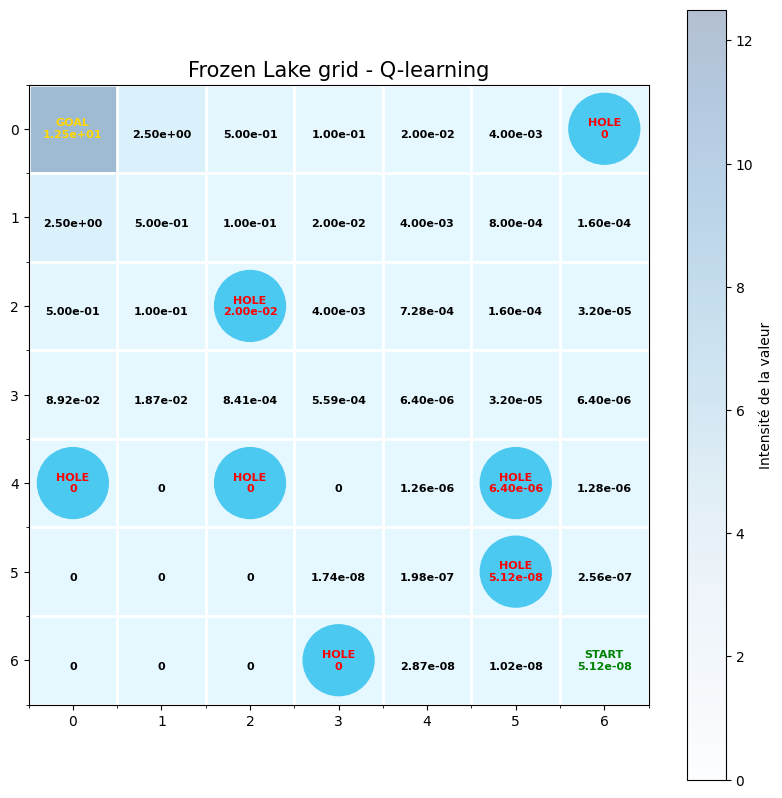

In [ ]:
# Affichage du tableau de jeu et des valeurs des différents états
draw_grid(
    df = value_cahe[-1],
    start_state = start_state,
    goal_state = goal_state,
    holes = bad_states,
    grid_size = (nb_line, nb_column),
    algorithm = "Q-learning"
)

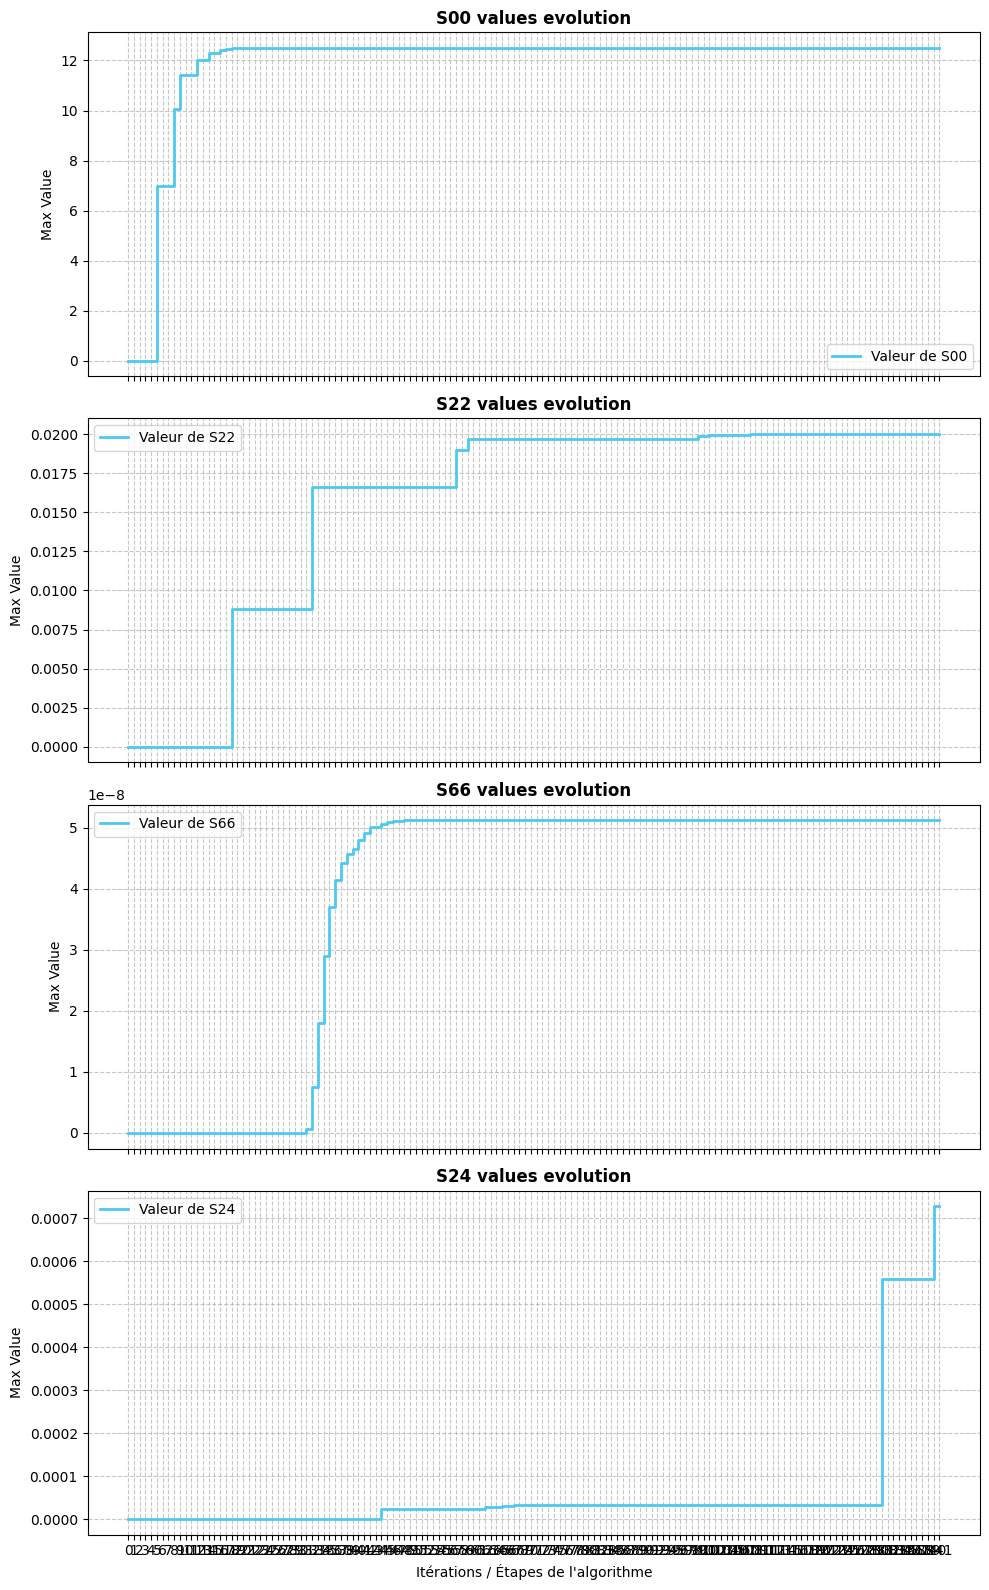

In [ ]:
# Ajouter les états dont vous voulez afficher l'évolution de valeur dans states_2_plot
states_2_plot = [goal_state, next(iter(bad_states)), start_state, "S24"]
plot_state_value(list_df = value_cahe, states = states_2_plot)

## Affichage des résultats : Q-learning, ϵ = 0.7

In [ ]:
_, Q_table, _, Data = init_data() #Réinitialisation des tables (Q_table, Q_policy, Q_value)
start = time.time() #Enregistrer l'heure de depart

# Voir la définition de Q_learning pour la valeur des hyperparamètres
epsilon = 0.7
value_cahe, path, Q_table = Q_learning(Q_table = Q_table, Data = Data, epsilon = epsilon) #Lancer l'algorithme Q-learning

end = time.time() #Enregistrer l'heure de fin

print("Temps d'exécution de Q-learning :", end - start, "secondes")

Step 1 terminé (iteration : 100)
Step 2 terminé (iteration : 95)
Step 3 terminé (iteration : 49)
Step 4 terminé (iteration : 99)
Step 5 terminé (iteration : 53)
Step 6 terminé (iteration : 57)
Step 7 terminé (iteration : 100)
Step 8 terminé (iteration : 100)
Step 9 terminé (iteration : 100)
Step 10 terminé (iteration : 100)
Step 11 terminé (iteration : 100)
Step 12 terminé (iteration : 100)
Step 13 terminé (iteration : 75)
Step 14 terminé (iteration : 97)
Step 15 terminé (iteration : 57)
Step 16 terminé (iteration : 91)
Step 17 terminé (iteration : 100)
Step 18 terminé (iteration : 27)
Step 19 terminé (iteration : 15)
Step 20 terminé (iteration : 81)
Step 21 terminé (iteration : 71)
Step 22 terminé (iteration : 43)
Step 23 terminé (iteration : 35)
Step 24 terminé (iteration : 39)
Step 25 terminé (iteration : 43)
Step 26 terminé (iteration : 69)
Step 27 terminé (iteration : 75)
Step 28 terminé (iteration : 31)
Step 29 terminé (iteration : 17)
Step 30 terminé (iteration : 39)
Step 31 ter

In [ ]:
# Affichage de la suite d'actions menant à la solution
print("\n --------------------- PATH ----------------------------- \n")
print(f"Partie remportée en : {len(path)} actions\n")
for elt in path :
  print(f"sate : {elt["state"]} => action : {elt["action"]} \n")

# Affichage de Q_table
print("\n --------------------- Q_table ----------------------------- \n")
print(Q_table)


 --------------------- PATH ----------------------------- 

Partie remportée en : 17 actions

sate : S66 => action : gauche 

sate : S65 => action : gauche 

sate : S64 => action : haut 

sate : S54 => action : gauche 

sate : S53 => action : gauche 

sate : S52 => action : gauche 

sate : S51 => action : gauche 

sate : S50 => action : haut 

sate : S40 => action : haut 

sate : S30 => action : haut 

sate : S20 => action : haut 

sate : S10 => action : droite 

sate : S11 => action : gauche 

sate : S10 => action : bas 

sate : S20 => action : haut 

sate : S10 => action : haut 

sate : S00 => action : arriver 


 --------------------- Q_table ----------------------------- 

   state        droite        gauche          haut           bas  arriver
0    S00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     12.5
1    S01  1.000000e-01  2.500000e+00  0.000000e+00  1.000000e-01      0.0
2    S02  2.000000e-02  5.000000e-01  0.000000e+00  2.000000e-02      0.0
3    S03  4.00000

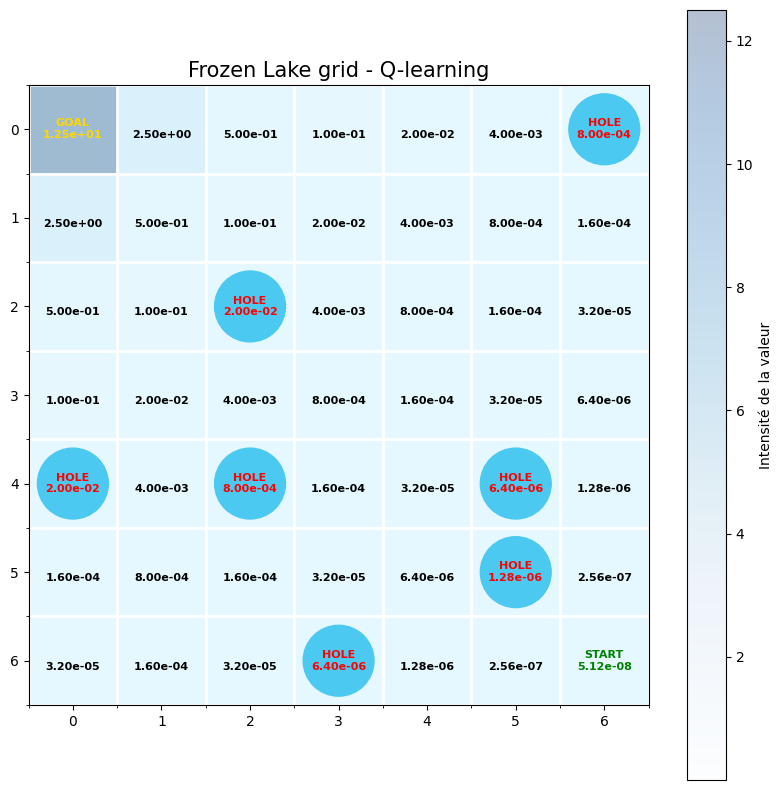

In [ ]:
# Affichage du tableau de jeu et des valeurs des différents états
draw_grid(
    df = value_cahe[-1],
    start_state = start_state,
    goal_state = goal_state,
    holes = bad_states,
    grid_size = (nb_line, nb_column),
    algorithm = "Q-learning"
)

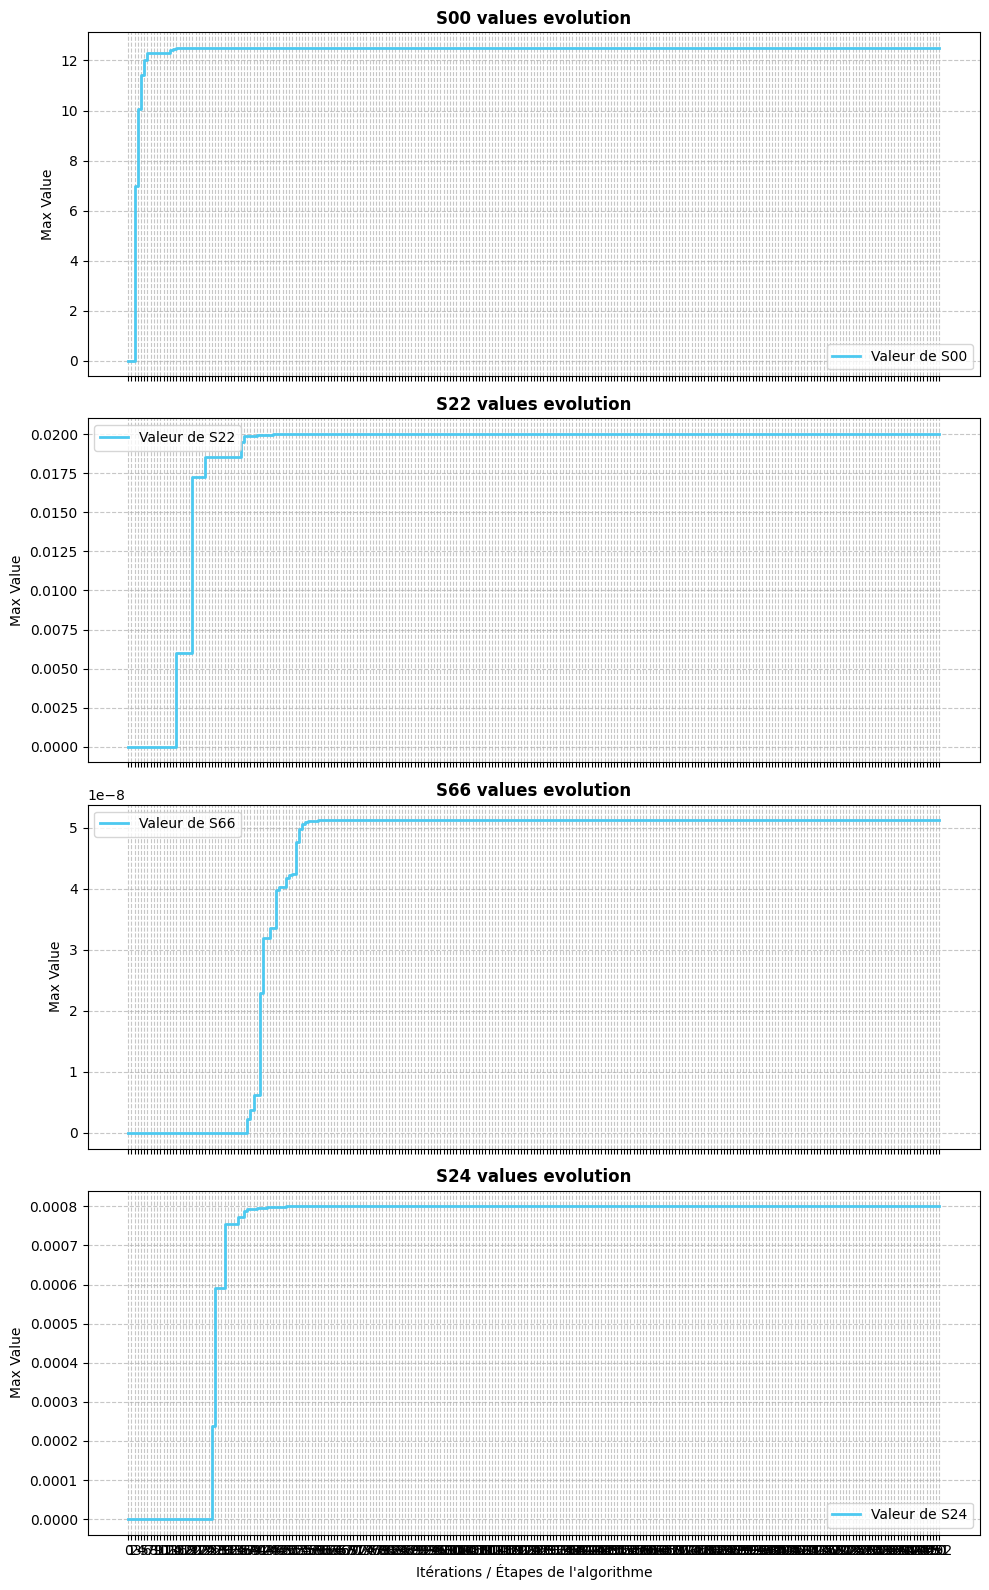

In [ ]:
# Ajouter les états dont vous voulez afficher l'évolution de valeur dans states_2_plot
states_2_plot = [goal_state, next(iter(bad_states)), start_state, "S24"]
plot_state_value(list_df = value_cahe, states = states_2_plot)

## Comparaison des algorithmes sur Frozen Lake

Nous comparons **Policy Iteration**, **Value Iteration** et **Q-learning (Epsilon-Greedy)** selon les critères suivants :
1. **Convergence** : nombre d’itérations nécessaires pour atteindre une politique stable.
2. **Qualité de la politique finale** : probabilité de succès (atteindre le goal) sur plusieurs épisodes simulés.
3. **Impact du paramètre ε** : pour Q-learning, influence sur l’exploration et la stabilité de la Q-table.

### 1. Convergence

| Method | Iteration / Step | Execution time (s) |
|------------|---------------------|-----------|
| Policy Iteration | ~16 itérations | 4 |
| Value Iteration | ~7 itérations | 0.5 |
| Q-learning ϵ=0.3, α=0.7 | ~82 épisodes | 10 |

> On remarque que **Value Iteration** converge plus rapidement, tandis que **Q-learning** nécessite plus d’épisodes pour stabiliser la Q-table. Mais contrairement a **Policy Iteration**, **Value Iteration** consomme plus de mémoire.

### 2. Qualité de la politique finale

> Les politiques dérivées de **Policy Iteration** et **Value Iteration** sont plus stables et optimales, car ces algorithmes utilisent un modèle complet de l’environnement. **Q-learning** atteint un résultat proche mais dépend fortement de l’exploration. Par exemple, pour ϵ = 0.3, on réalise ~13 actions pour arriver au but, mais il peut y avoir des états inexplorés. Par contre, pour ϵ = 0.7, on réalise ~25 actions mais tous les états ont été explorés. Ce qui s'explique. Car pour ϵ faible, on va privilégier l'exploitation des résultats qu'on a sur les états visités. On visitera ainsi moins d'états (d'où une Q-table partiellement remplie). Par contre, on exploitera au mieux notre connaissance, d'où un nombre d'actions relativement faible pour arriver au but. À l'inverse, si ϵ grand, on privilégie l'exploration (Q-table pleine). Mais on exploite beaucoup moins notre connaissance, d'où plusieurs actions pour arriver au but.

### 3. Impact du paramètre ε sur Q-learning

| Q-learning | Nombre d’episodes |
|------------|-------------------|
| ϵ=0.1, α=0.7 | ~16 épisodes |
| ϵ=0.3, α=0.7 | ~82 épisodes |
| ϵ=0.7, α=0.7 | ~186 épisodes |
| ϵ=0.9, α=0.7 | ~131 épisodes |

- **ε faible (0.1)** : moins d’exploration, la Q-table converge plus vite mais risque de rester bloquée dans une politique sous-optimale.  
- **ε modéré (0.3)** : bon compromis entre exploration et exploitation, meilleure politique finale.  
- **ε élevé (0.7)** : beaucoup d’exploration, Q-table plus lente à converger Car à chaque itération beaucoup de hasard. on n'exploite pas efficacement la connaissance acquise